### Installs

In [ ]:
pip install imbalanced-learn

In [ ]:
pip install hyperopt

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00


In [ ]:
pip install lightgbm

### Upload data

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

# After mounting, you can access files in 'My Drive/Project' using:
path = '/content/drive/My Drive/tia'


# Change the current working directory to the specified path
os.chdir(path)

# Confirm the current working directory
print("Current Working Directory: ", os.getcwd())

Mounted at /content/drive
Current Working Directory:  /content/drive/My Drive/tia


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv("train.csv", index_col = 0)
x_train = train_data.iloc[:, :-1]
y_train = train_data[['is_anomaly']]

test_data = pd.read_csv("test.csv", index_col = 0)
x_test = test_data

y_test = pd.read_csv("submission_50_instead_of_16.csv", index_col = 0)

###Inspect data

In [ ]:
print('train_data shape: ', train_data.shape)
print('test_data shape: ', test_data.shape)

print('\n\nnr anomalii:\n', (y_train != 0).sum(), '\n\n')

print(train_data.describe())

train_data shape:  (144, 7)
test_data shape:  (192, 6)


nr anomalii:
 is_anomaly    14
dtype: int64 


        feature_0   feature_1   feature_2   feature_3   feature_4   feature_5  \
count  144.000000  144.000000  144.000000  144.000000  144.000000  144.000000   
mean    64.226751   19.561420   54.079310   44.703726  117.250586   35.702038   
std     18.145381   10.436813   18.725270   14.851784   13.590508   45.957506   
min     30.577565   -3.653628   18.995085   12.791948   70.660124   -9.957228   
25%     48.680970   12.794194   39.482445   33.876683  110.247439    5.182902   
50%     65.071287   17.890558   51.512030   43.373902  117.117564   27.227696   
75%     76.047032   24.860083   66.524102   55.151957  124.157933   54.205813   
max    128.573395   48.715990   94.829946  122.478511  163.339675  419.262574   

       is_anomaly  
count  144.000000  
mean     0.097222  
std      0.297294  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max   

### Process data

In [ ]:
# normalizarea datelor (standardizare z-score)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)

### Scatter plots

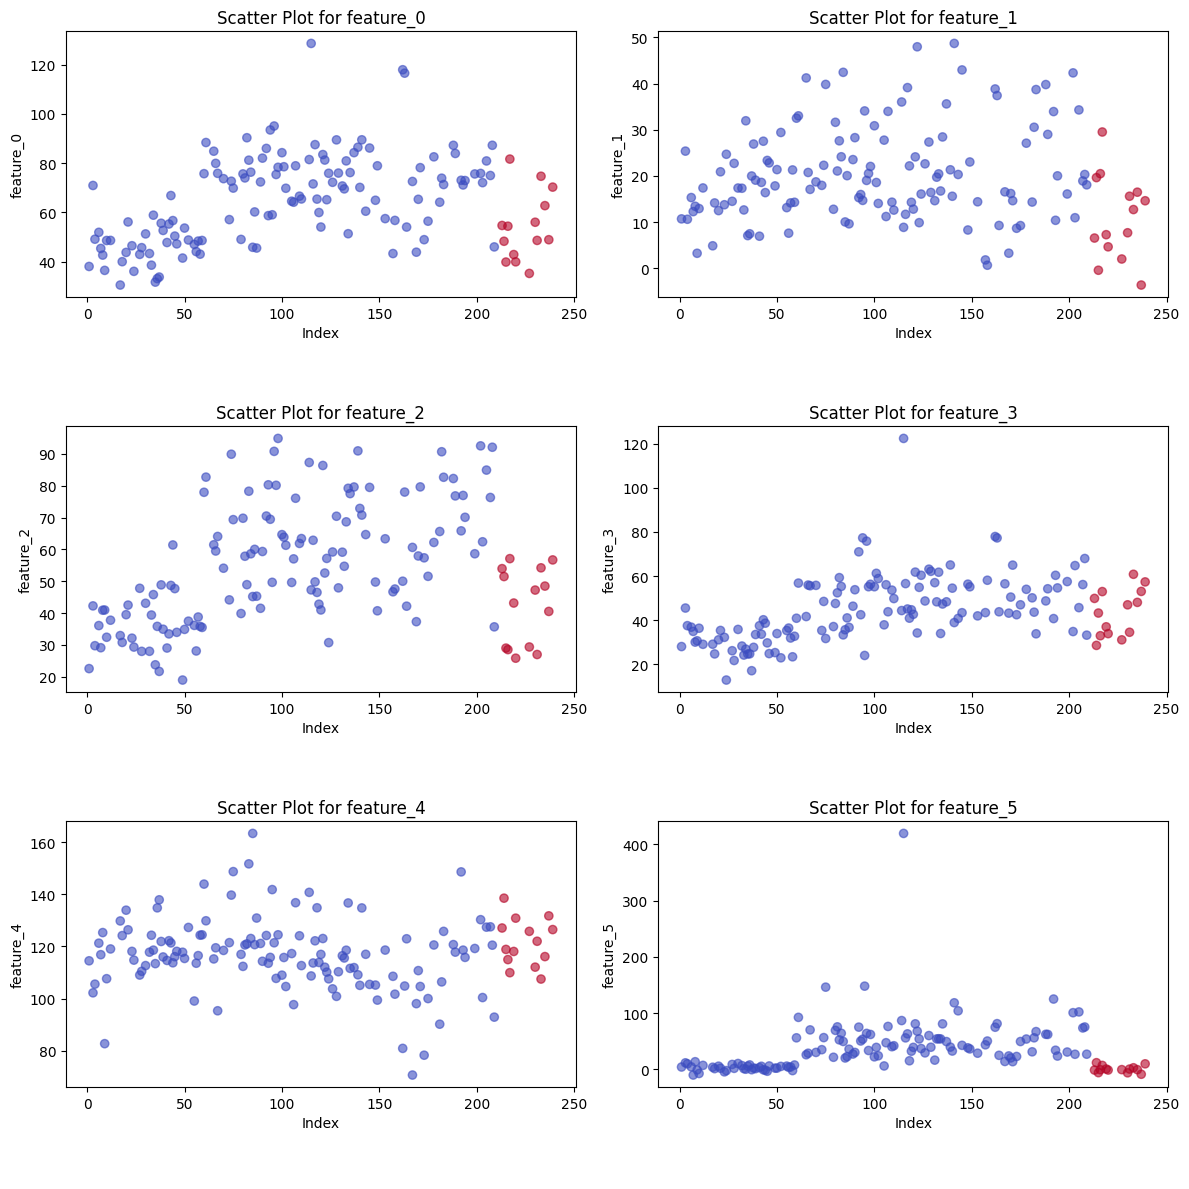

In [ ]:
columns = x_train.columns[:6]  # Selecting the first 6 columns
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # Creating a 3x2 subplot grid

y_train_numeric = np.array(y_train).astype(float)


# Iterate over the selected columns and create scatter plots
for i, ax in enumerate(axes.ravel()):
    # Scatter plot with color based on y_train values
    scatter = ax.scatter(x_train.index, x_train[columns[i]], c=y_train_numeric, cmap='coolwarm', alpha=0.6)

    ax.set_title(f'Scatter Plot for {columns[i]}')
    ax.set_xlabel('Index\n\n\n')
    ax.set_ylabel(columns[i])

plt.tight_layout()

# Optional: Create a color bar to represent the binary values
cbar = plt.colorbar(scatter, ax=axes.ravel().tolist(), orientation='horizontal')
cbar.set_label('Binary Values of y_train')

plt.show()

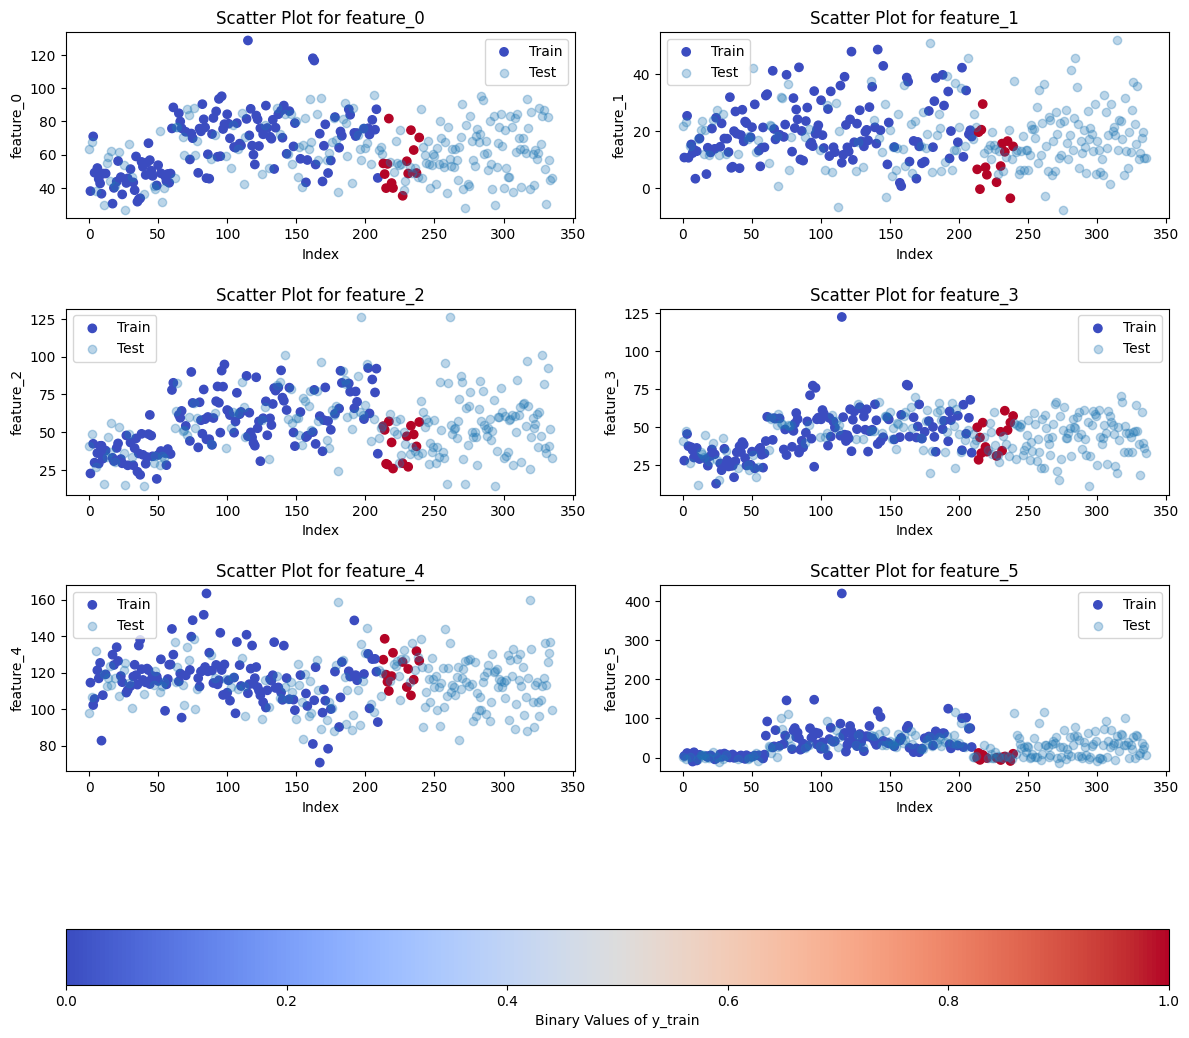

In [ ]:
columns = x_train.columns[:6]  # Selecting the first 6 columns
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # Creating a 3x2 subplot grid

y_train_numeric = np.array(y_train).astype(float)

# Iterate over the selected columns and create scatter plots
for i, ax in enumerate(axes.ravel()):
    # Scatter plot for x_train with color based on y_train values
    scatter_train = ax.scatter(x_train.index, x_train[columns[i]], c=y_train_numeric, cmap='coolwarm', alpha=1, label='Train')

    # Scatter plot for x_test, without color coding by y_test
    scatter_test = ax.scatter(x_test.index, x_test[columns[i]], alpha=0.3, label='Test')

    ax.set_title(f'Scatter Plot for {columns[i]}')
    ax.set_xlabel('Index\n\n\n')
    ax.set_ylabel(columns[i])

    # Add a legend to each subplot to distinguish train and test points
    ax.legend()

plt.tight_layout()

# Optional: Create a color bar to represent the binary values of y_train
cbar = plt.colorbar(scatter_train, ax=axes.ravel().tolist(), orientation='horizontal')
cbar.set_label('Binary Values of y_train')

plt.show()

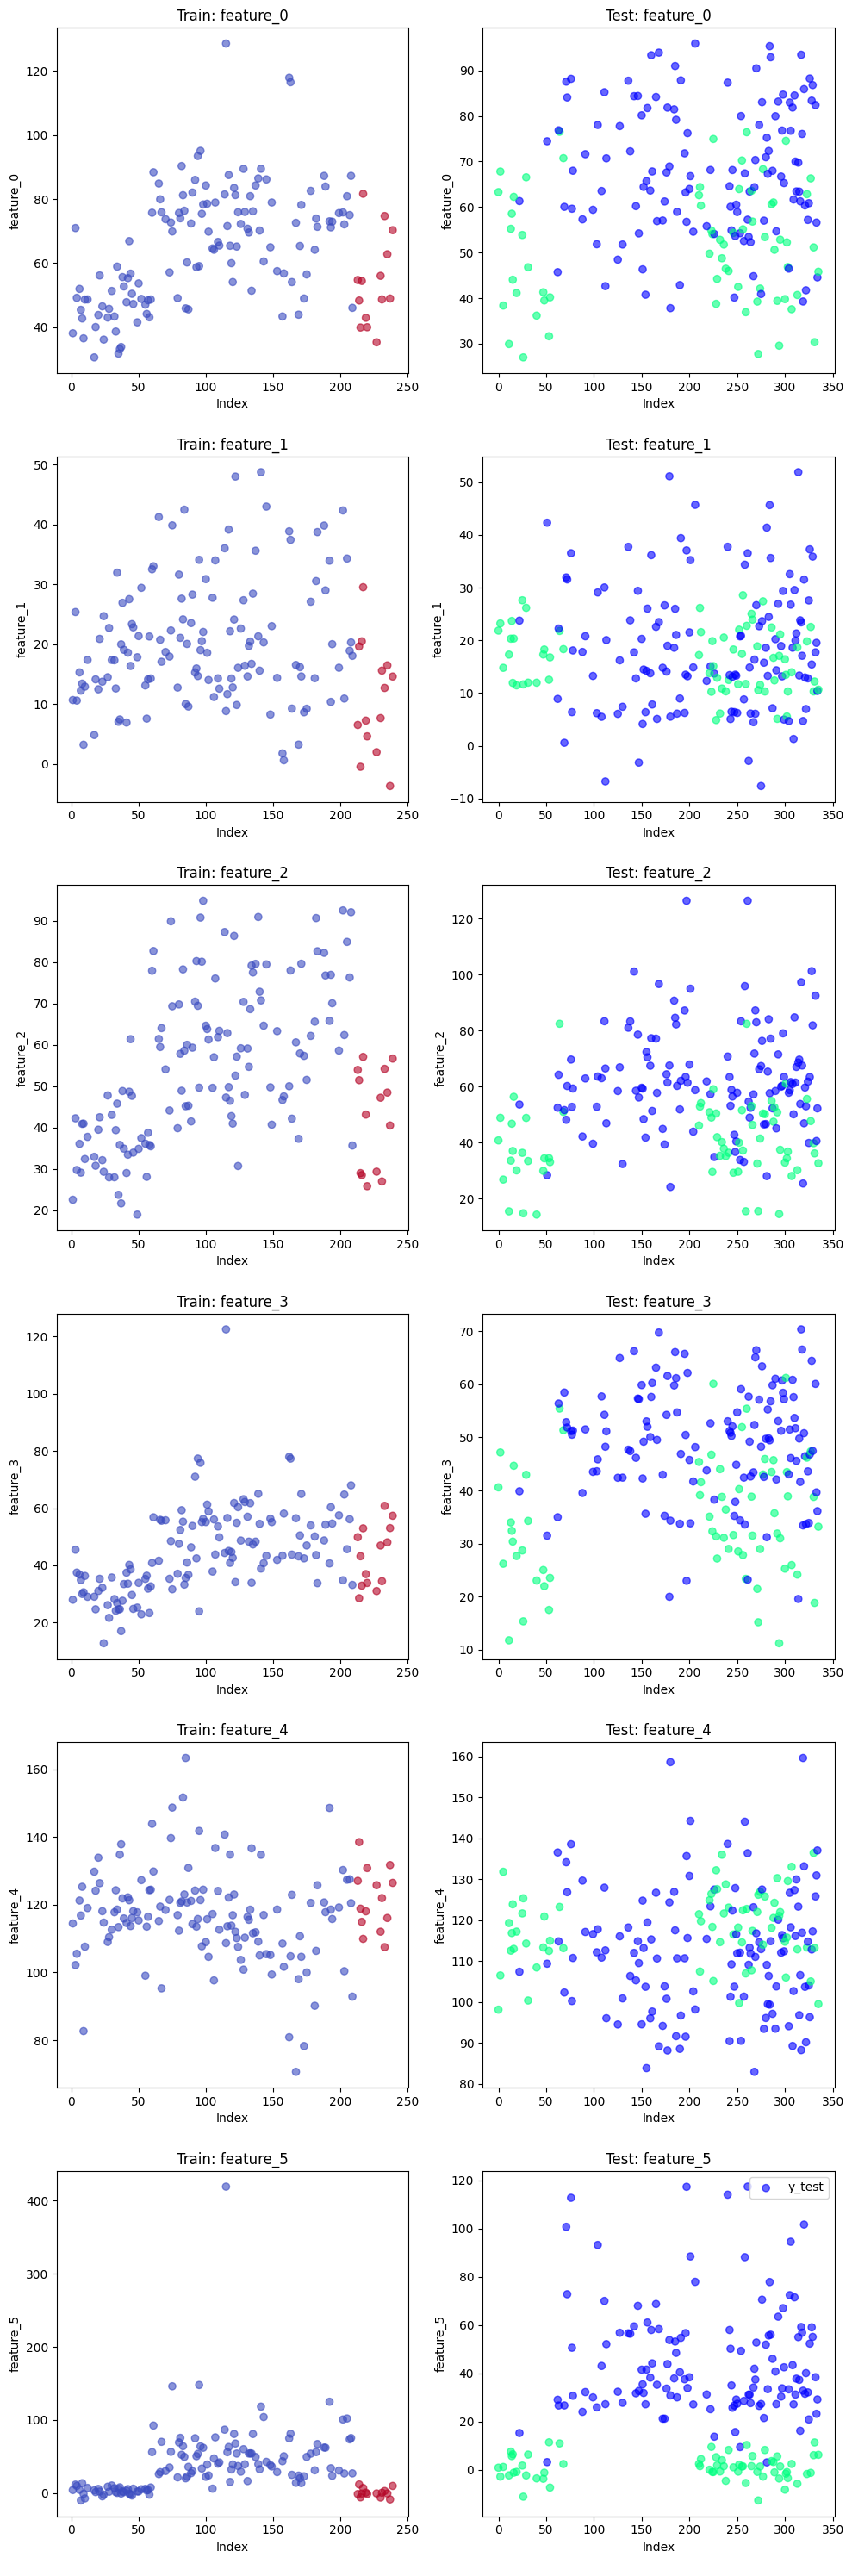

In [ ]:
columns = x_train.columns[:6]  # Selecting the first 6 columns
fig, axes = plt.subplots(2, 6, figsize=(24, 8))  # Creating a 2x6 subplot grid

y_train_numeric = np.array(y_train).astype(float)
y_test_numeric = np.array(y_test).astype(float)  # Convert y_test to numeric

# Iterate over the selected columns
for i, column in enumerate(columns):
    # Scatter plot for y_train in the first row
    axes[0, i].scatter(x_train.index, x_train[column], c=y_train_numeric, cmap='coolwarm', alpha=0.6, label='y_train')
    axes[0, i].set_title(f'Train: {column}')

    # Scatter plot for y_test in the second row
    axes[1, i].scatter(x_test.index, x_test[column], c=y_test_numeric, cmap='winter', alpha=0.6, label='y_test')
    axes[1, i].set_title(f'Test: {column}')

    # Setting x and y labels for each subplot
    for ax in axes[:, i]:
        ax.set_xlabel('Index\n')
        ax.set_ylabel(column)

plt.tight_layout()

# Add legend
plt.legend()
plt.show()

### Parallel Coordinates Plot

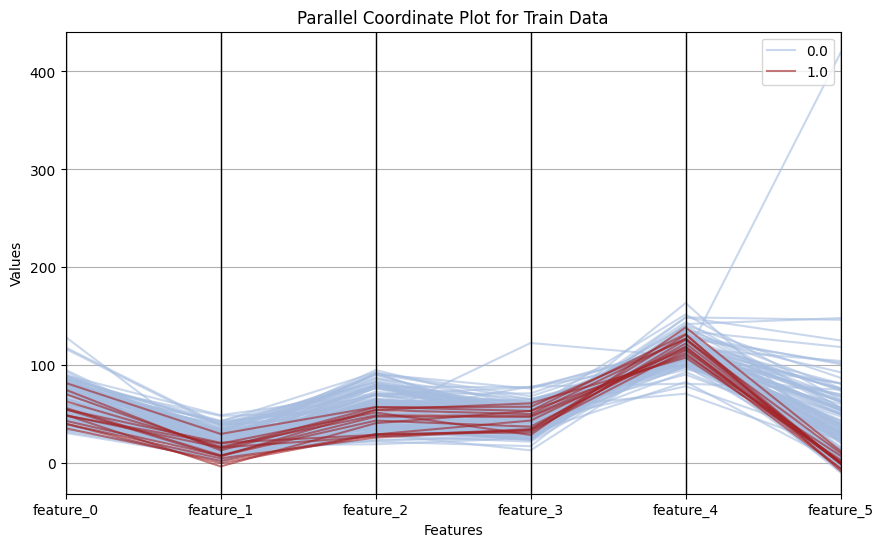

In [ ]:
train_df = pd.concat([x_train, y_train], axis=1)
test_df = pd.concat([x_test, y_test], axis=1)
combined_df = pd.concat([train_df, test_df], axis=0)

# Plotting the parallel coordinates
plt.figure(figsize=(10,6))
pd.plotting.parallel_coordinates(
    combined_df,
    class_column='is_anomaly',
    color=('#4682B4', '#FF6347'),  # Using two different colors for the binary values
    alpha=0.9
)
plt.title('Parallel Coordinate Plot for Combined Data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

### Box Plot // Data exploration

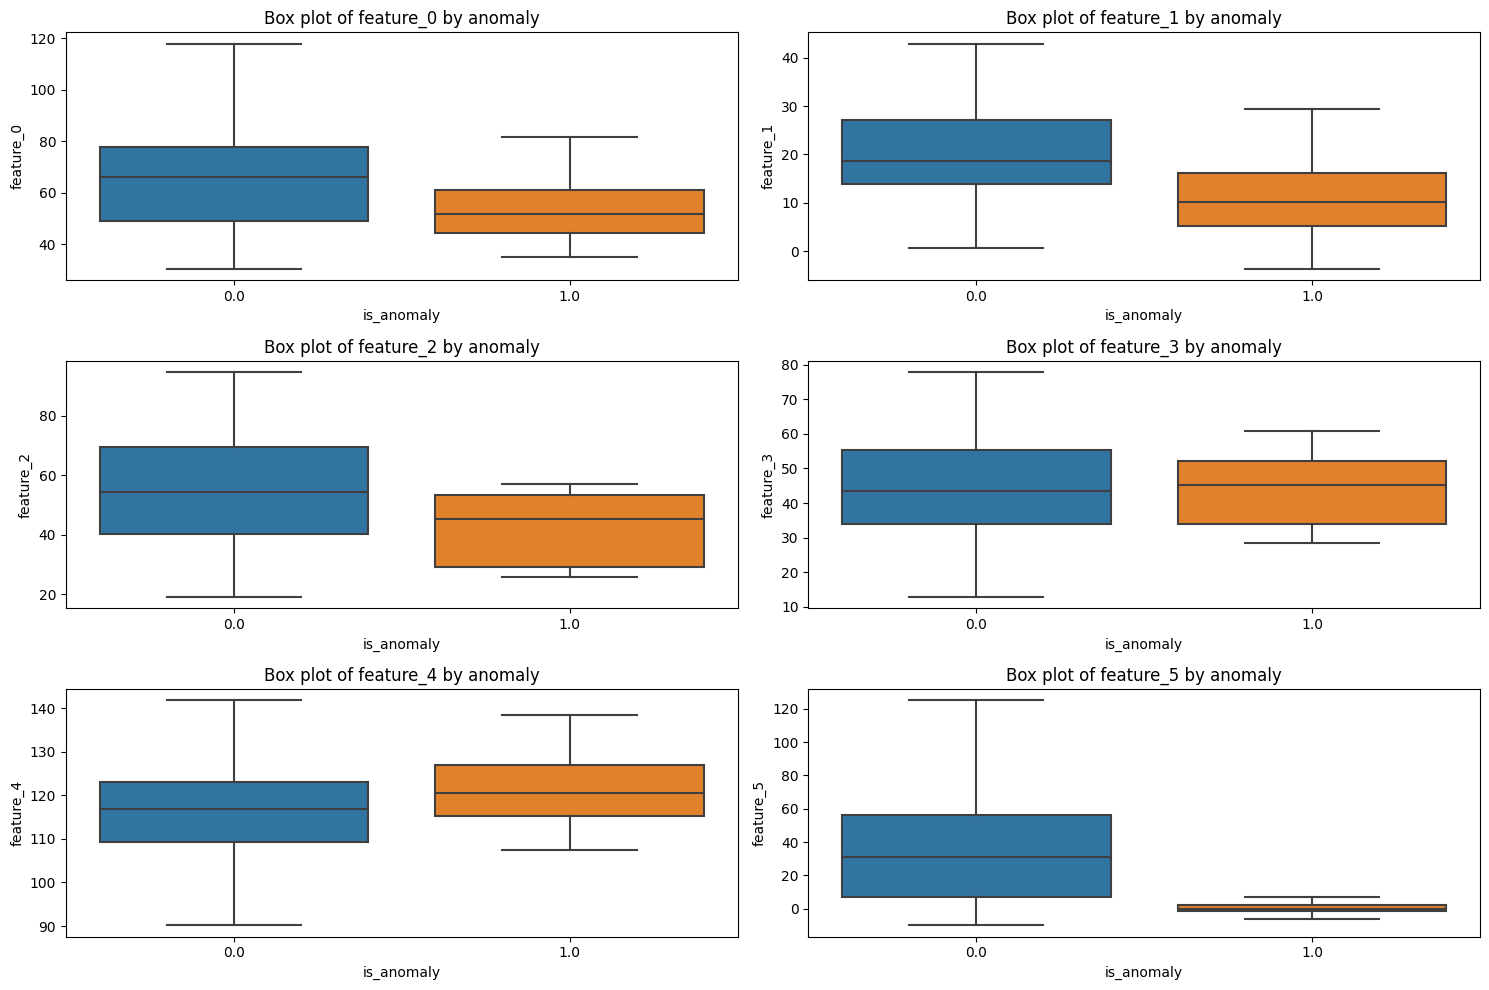

In [ ]:
plt.figure(figsize=(15, 10))

# Iterate over the columns to create a box plot for each
for i, col in enumerate(x_train.columns):
    plt.subplot(3, 2, i + 1)  # Adjust the number of rows/columns as per the number of features
    # Use showfliers=False to not show outliers
    sns.boxplot(x='is_anomaly', y=col, data=train_data, showfliers=False)
    plt.title(f'Box plot of {col} by anomaly')

plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()  # Display the plot

### Class Distribution

is_anomaly
0.0           130
1.0            14
dtype: int64
is_anomaly
0.0           0.902778
1.0           0.097222
dtype: float64


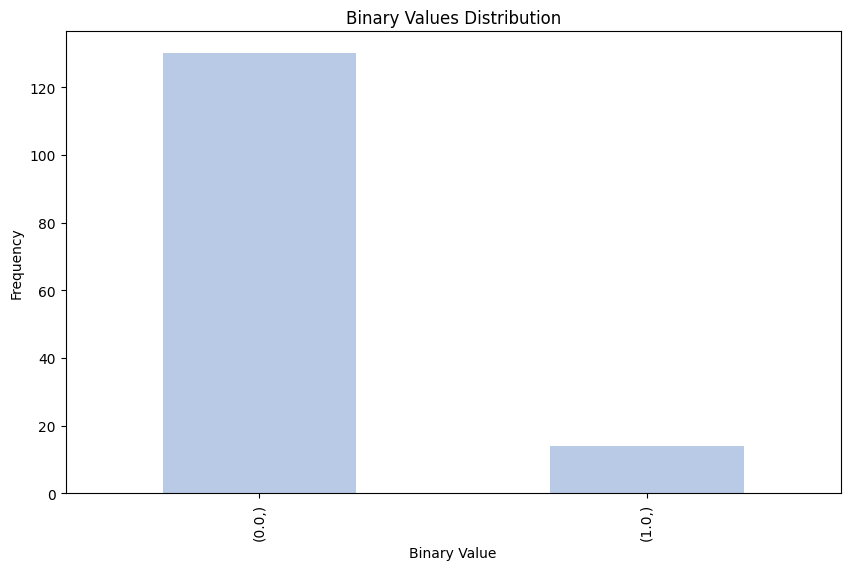

In [ ]:
class_distribution = y_train.value_counts()
print(class_distribution)

# Calculate and print proportions
proportions = class_distribution / len(y_train)
print(proportions)

# Plotting
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color = '#a6bde0', alpha = 0.8)
plt.title('Binary Values Distribution')
plt.xlabel('Binary Value')
plt.ylabel('Frequency')
plt.show()

# Data is imbalanced

### Balancing Data

In [ ]:
from imblearn.over_sampling import ADASYN

# Initialize ADASYN
adasyn = ADASYN()

# Fit and apply the transform
x_train_balanced, y_train_balanced = adasyn.fit_resample(x_train, y_train)

# Now X_train_balanced and y_train_balanced have balanced classes

is_anomaly
1.0           132
0.0           130
dtype: int64
is_anomaly
1.0           0.503817
0.0           0.496183
dtype: float64


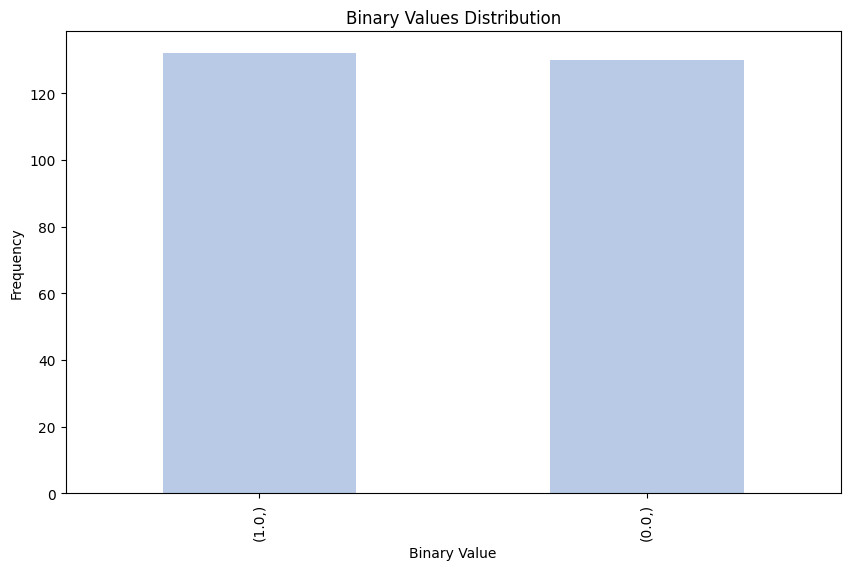

In [ ]:
class_distribution = y_train_balanced.value_counts()
print(class_distribution)

# Calculate and print proportions
proportions = class_distribution / len(y_train_balanced)
print(proportions)

# Plotting
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color = '#a6bde0', alpha = 0.8)
plt.title('Binary Values Distribution')
plt.xlabel('Binary Value')
plt.ylabel('Frequency')
plt.show()

### Drop, Scale and PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

x_train_dropped = x_train_balanced.drop('feature_3', axis=1)
x_test_dropped = x_test.drop('feature_3', axis=1)

transformer = RobustScaler()
x_train_rob = transformer.fit_transform(x_train_dropped)

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train_rob)

pca =  PCA(n_components = 0.95)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_dropped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


### Optuna

In [ ]:
import optuna
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Import the necessary models
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", ["LogisticRegression", "KNeighbors",
                                                               "SVC", "DecisionTree", "RandomForest",
                                                               "AdaBoost", "GradientBoosting", "GaussianNB",
                                                               "LinearDiscriminantAnalysis", "XGBClassifier",
                                                               "LGBMClassifier", "CatBoostClassifier"])


    if classifier_name == "LogisticRegression":
      C = trial.suggest_float("lr_C", 1e-4, 1e4, log=True)
      penalty = trial.suggest_categorical("lr_penalty", ["l1", "l2", "elasticnet", "none"])
      solver = trial.suggest_categorical("lr_solver", ["lbfgs", "liblinear", "sag"])
      l1_ratio = None

      if penalty == "elasticnet":
        l1_ratio = trial.suggest_float("lr_l1_ratio", 0, 1)

    # Some solvers only support specific penalties, so we set up conditions to ensure compatibility
      if solver == "liblinear":
          if penalty in ["none", "elasticnet"]:
              penalty = "l2"
      elif solver in ["lbfgs", "sag"]:
          penalty = "l2"  # These solvers only support L2

      classifier_obj = LogisticRegression(C=C, penalty=penalty, solver=solver, l1_ratio=l1_ratio, max_iter=1000)

    elif classifier_name == "KNeighbors":
        n_neighbors = trial.suggest_int("knn_n_neighbors", 2, 50)
        classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)

    elif classifier_name == "SVC":
        C = trial.suggest_float("svc_C", 1e-4, 1e4, log=True)
        classifier_obj = SVC(C=C)

    elif classifier_name == "DecisionTree":
        max_depth = trial.suggest_int("dt_max_depth", 1, 32)
        classifier_obj = DecisionTreeClassifier(max_depth=max_depth)

    elif classifier_name == "RandomForest":
        n_estimators = trial.suggest_int("rf_n_estimators", 10, 100)
        max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)

    elif classifier_name == "AdaBoost":
        n_estimators = trial.suggest_int("ab_n_estimators", 10, 100)
        learning_rate = trial.suggest_float("ab_learning_rate", 0.01, 1)
        classifier_obj = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)

    elif classifier_name == "GradientBoosting":
        n_estimators = trial.suggest_int("gb_n_estimators", 10, 100)
        learning_rate = trial.suggest_float("gb_learning_rate", 0.01, 1)
        max_depth = trial.suggest_int("gb_max_depth", 1, 32)
        classifier_obj = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)

    elif classifier_name == "GaussianNB":
        classifier_obj = GaussianNB()

    elif classifier_name == "LinearDiscriminantAnalysis":
        classifier_obj = LinearDiscriminantAnalysis()

    elif classifier_name == "XGBClassifier":
        n_estimators = trial.suggest_int("xgb_n_estimators", 10, 100)
        max_depth = trial.suggest_int("xgb_max_depth", 2, 32)
        learning_rate = trial.suggest_float("xgb_learning_rate", 0.01, 1)
        classifier_obj = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)

    elif classifier_name == "LGBMClassifier":
        n_estimators = trial.suggest_int("lgbm_n_estimators", 10, 100)
        max_depth = trial.suggest_int("lgbm_max_depth", 1, 30)
        learning_rate = trial.suggest_float("lgbm_learning_rate", 0.01, 1)
        num_leaves = trial.suggest_int("lgbm_num_leaves", 2, 256)
        classifier_obj = LGBMClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, num_leaves=num_leaves)

    elif classifier_name == "CatBoostClassifier":
        iterations = trial.suggest_int("catboost_iterations", 10, 100)
        depth = trial.suggest_int("catboost_depth", 4, 10)
        learning_rate = trial.suggest_float("catboost_learning_rate", 0.01, 1)
        classifier_obj = CatBoostClassifier(iterations=iterations, depth=depth, learning_rate=learning_rate, verbose=0)

    # Fit the model
    classifier_obj.fit(x_train_pca, y_train_balanced)

    # Predict and calculate accuracy
    preds = classifier_obj.predict(x_test_pca)
    accuracy = accuracy_score(y_test, preds)

    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300)

print("Best parameters: ", study.best_params)
print("Best accuracy: ", study.best_value)

[I 2024-01-15 15:10:53,249] A new study created in memory with name: no-name-f8601e93-c969-40cd-8cbe-298e8d1c75d7
[I 2024-01-15 15:10:53,282] Trial 0 finished with value: 0.6979166666666666 and parameters: {'classifier': 'DecisionTree', 'dt_max_depth': 21}. Best is trial 0 with value: 0.6979166666666666.
[I 2024-01-15 15:10:53,473] Trial 1 finished with value: 0.6979166666666666 and parameters: {'classifier': 'GradientBoosting', 'gb_n_estimators': 20, 'gb_learning_rate': 0.15042551242983251, 'gb_max_depth': 16}. Best is trial 0 with value: 0.6979166666666666.
[I 2024-01-15 15:10:53,570] Trial 2 finished with value: 0.6979166666666666 and parameters: {'classifier': 'KNeighbors', 'knn_n_neighbors': 31}. Best is trial 0 with value: 0.6979166666666666.
[I 2024-01-15 15:10:53,732] Trial 3 finished with value: 0.6979166666666666 and parameters: {'classifier': 'SVC', 'svc_C': 8012.0893900862075}. Best is trial 0 with value: 0.6979166666666666.
[I 2024-01-15 15:10:53,753] Trial 4 finished with

[LightGBM] [Info] Number of positive: 132, number of negative: 130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503817 -> initscore=0.015267
[LightGBM] [Info] Start training from score 0.015267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-01-15 15:10:59,200] Trial 15 finished with value: 0.6979166666666666 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 50, 'rf_max_depth': 9}. Best is trial 6 with value: 0.9010416666666666.
[I 2024-01-15 15:11:03,805] Trial 16 finished with value: 0.6979166666666666 and parameters: {'classifier': 'CatBoostClassifier', 'catboost_iterations': 100, 'catboost_depth': 9, 'catboost_learning_rate': 0.15551037180900334}. Best is trial 6 with value: 0.9010416666666666.
[I 2024-01-15 15:11:03,931] Trial 17 finished with value: 0.9010416666666666 and parameters: {'classifier': 'LinearDiscriminantAnalysis'}. Best is trial 6 with value: 0.9010416666666666.
[I 2024-01-15 15:11:03,942] Trial 18 finished with value: 0.9010416666666666 and parameters: {'classifier': 'LinearDiscriminantAnalysis'}. Best is trial 6 with value: 0.9010416666666666.
[I 2024-01-15 15:11:03,959] Trial 19 finished with value: 0.6979166666666666 and parameters: {'classifier': 'DecisionTree', 'dt_max_dept

[LightGBM] [Info] Number of positive: 132, number of negative: 130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503817 -> initscore=0.015267
[LightGBM] [Info] Start training from score 0.015267


[I 2024-01-15 15:11:06,779] Trial 37 finished with value: 0.6979166666666666 and parameters: {'classifier': 'GradientBoosting', 'gb_n_estimators': 99, 'gb_learning_rate': 0.012476247975965415, 'gb_max_depth': 32}. Best is trial 6 with value: 0.9010416666666666.
[I 2024-01-15 15:11:06,824] Trial 38 finished with value: 0.6979166666666666 and parameters: {'classifier': 'KNeighbors', 'knn_n_neighbors': 50}. Best is trial 6 with value: 0.9010416666666666.
[I 2024-01-15 15:11:06,846] Trial 39 finished with value: 0.6979166666666666 and parameters: {'classifier': 'SVC', 'svc_C': 20.898356020378767}. Best is trial 6 with value: 0.9010416666666666.
[I 2024-01-15 15:11:06,860] Trial 40 finished with value: 0.9010416666666666 and parameters: {'classifier': 'LinearDiscriminantAnalysis'}. Best is trial 6 with value: 0.9010416666666666.
[I 2024-01-15 15:11:06,878] Trial 41 finished with value: 0.9010416666666666 and parameters: {'classifier': 'LinearDiscriminantAnalysis'}. Best is trial 6 with valu

[LightGBM] [Info] Number of positive: 132, number of negative: 130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503817 -> initscore=0.015267
[LightGBM] [Info] Start training from score 0.015267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-01-15 15:11:10,627] Trial 56 finished with value: 0.6979166666666666 and parameters: {'classifier': 'CatBoostClassifier', 'catboost_iterations': 64, 'catboost_depth': 5, 'catboost_learning_rate': 0.7019928394016977}. Best is trial 6 with value: 0.9010416666666666.
[I 2024-01-15 15:11:10,652] Trial 57 finished with value: 0.6979166666666666 and parameters: {'classifier': 'DecisionTree', 'dt_max_depth': 1}. Best is trial 6 with value: 0.9010416666666666.
[I 2024-01-15 15:11:10,669] Trial 58 finished with value: 0.9010416666666666 and parameters: {'classifier': 'LinearDiscriminantAnalysis'}. Best is trial 6 with value: 0.9010416666666666.
[I 2024-01-15 15:11:10,688] Trial 59 finished with value: 0.9010416666666666 and parameters: {'classifier': 'LinearDiscriminantAnalysis'}. Best is trial 6 with value: 0.9010416666666666.
[I 2024-01-15 15:11:10,723] Trial 60 finished with value: 0.3020833333333333 and parameters: {'classifier': 'SVC', 'svc_C': 0.00010711551129107982}. Best is tria

[LightGBM] [Info] Number of positive: 132, number of negative: 130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503817 -> initscore=0.015267
[LightGBM] [Info] Start training from score 0.015267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-01-15 15:11:14,254] Trial 78 finished with value: 0.6979166666666666 and parameters: {'classifier': 'KNeighbors', 'knn_n_neighbors': 50}. Best is trial 6 with value: 0.9010416666666666.
[I 2024-01-15 15:11:14,269] Trial 79 finished with value: 0.9010416666666666 and parameters: {'classifier': 'LinearDiscriminantAnalysis'}. Best is trial 6 with value: 0.9010416666666666.
[I 2024-01-15 15:11:14,282] Trial 80 finished with value: 0.9010416666666666 and parameters: {'classifier': 'LinearDiscriminantAnalysis'}. Best is trial 6 with value: 0.9010416666666666.
[I 2024-01-15 15:11:14,295] Trial 81 finished with value: 0.9010416666666666 and parameters: {'classifier': 'LinearDiscriminantAnalysis'}. Best is trial 6 with value: 0.9010416666666666.
[I 2024-01-15 15:11:14,313] Trial 82 finished with value: 0.6979166666666666 and parameters: {'classifier': 'DecisionTree', 'dt_max_depth': 15}. Best is trial 6 with value: 0.9010416666666666.
[I 2024-01-15 15:11:14,325] Trial 83 finished with v

[LightGBM] [Info] Number of positive: 132, number of negative: 130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503817 -> initscore=0.015267
[LightGBM] [Info] Start training from score 0.015267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-01-15 15:11:19,532] Trial 152 finished with value: 0.6979166666666666 and parameters: {'classifier': 'DecisionTree', 'dt_max_depth': 13}. Best is trial 125 with value: 0.9427083333333334.
[I 2024-01-15 15:11:19,562] Trial 153 finished with value: 0.9375 and parameters: {'classifier': 'LogisticRegression', 'lr_C': 0.14426383414731422, 'lr_penalty': 'l1', 'lr_solver': 'sag'}. Best is trial 125 with value: 0.9427083333333334.
[I 2024-01-15 15:11:19,588] Trial 154 finished with value: 0.7291666666666666 and parameters: {'classifier': 'LogisticRegression', 'lr_C': 0.01686547586770774, 'lr_penalty': 'l1', 'lr_solver': 'sag'}. Best is trial 125 with value: 0.9427083333333334.
[I 2024-01-15 15:11:19,613] Trial 155 finished with value: 0.6979166666666666 and parameters: {'classifier': 'SVC', 'svc_C': 0.15102168528628868}. Best is trial 125 with value: 0.9427083333333334.
[I 2024-01-15 15:11:19,709] Trial 156 finished with value: 0.6979166666666666 and parameters: {'classifier': 'Gradien

[LightGBM] [Info] Number of positive: 132, number of negative: 130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503817 -> initscore=0.015267
[LightGBM] [Info] Start training from score 0.015267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-01-15 15:11:21,810] Trial 191 finished with value: 0.9375 and parameters: {'classifier': 'LogisticRegression', 'lr_C': 0.15259558842210016, 'lr_penalty': 'l1', 'lr_solver': 'liblinear'}. Best is trial 125 with value: 0.9427083333333334.
[I 2024-01-15 15:11:21,845] Trial 192 finished with value: 0.6979166666666666 and parameters: {'classifier': 'LogisticRegression', 'lr_C': 0.07761689560656794, 'lr_penalty': 'l1', 'lr_solver': 'liblinear'}. Best is trial 125 with value: 0.9427083333333334.
[I 2024-01-15 15:11:21,876] Trial 193 finished with value: 0.90625 and parameters: {'classifier': 'LogisticRegression', 'lr_C': 0.17389515674402267, 'lr_penalty': 'l1', 'lr_solver': 'liblinear'}. Best is trial 125 with value: 0.9427083333333334.
[I 2024-01-15 15:11:21,908] Trial 194 finished with value: 0.9114583333333334 and parameters: {'classifier': 'LogisticRegression', 'lr_C': 0.34341935864001566, 'lr_penalty': 'l1', 'lr_solver': 'liblinear'}. Best is trial 125 with value: 0.9427083333333

[LightGBM] [Info] Number of positive: 132, number of negative: 130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503817 -> initscore=0.015267
[LightGBM] [Info] Start training from score 0.015267


[I 2024-01-15 15:11:27,839] Trial 243 finished with value: 0.90625 and parameters: {'classifier': 'LogisticRegression', 'lr_C': 0.23375741349109758, 'lr_penalty': 'l1', 'lr_solver': 'sag'}. Best is trial 125 with value: 0.9427083333333334.
[I 2024-01-15 15:11:27,864] Trial 244 finished with value: 0.9427083333333334 and parameters: {'classifier': 'LogisticRegression', 'lr_C': 0.13839413336369602, 'lr_penalty': 'l1', 'lr_solver': 'sag'}. Best is trial 125 with value: 0.9427083333333334.
[I 2024-01-15 15:11:27,892] Trial 245 finished with value: 0.8854166666666666 and parameters: {'classifier': 'LogisticRegression', 'lr_C': 0.08902729830998074, 'lr_penalty': 'l1', 'lr_solver': 'sag'}. Best is trial 125 with value: 0.9427083333333334.
[I 2024-01-15 15:11:27,918] Trial 246 finished with value: 0.9270833333333334 and parameters: {'classifier': 'LogisticRegression', 'lr_C': 0.15627640326472125, 'lr_penalty': 'l1', 'lr_solver': 'sag'}. Best is trial 125 with value: 0.9427083333333334.
[I 2024

[LightGBM] [Info] Number of positive: 132, number of negative: 130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503817 -> initscore=0.015267
[LightGBM] [Info] Start training from score 0.015267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-01-15 15:11:31,975] Trial 280 finished with value: 0.90625 and parameters: {'classifier': 'LogisticRegression', 'lr_C': 0.22945096737493875, 'lr_penalty': 'l1', 'lr_solver': 'sag'}. Best is trial 125 with value: 0.9427083333333334.
[I 2024-01-15 15:11:32,002] Trial 281 finished with value: 0.8645833333333334 and parameters: {'classifier': 'LogisticRegression', 'lr_C': 0.07556710083060358, 'lr_penalty': 'l1', 'lr_solver': 'sag'}. Best is trial 125 with value: 0.9427083333333334.
[I 2024-01-15 15:11:32,031] Trial 282 finished with value: 0.9375 and parameters: {'classifier': 'LogisticRegression', 'lr_C': 0.13418165106544394, 'lr_penalty': 'l1', 'lr_solver': 'sag'}. Best is trial 125 with value: 0.9427083333333334.
[I 2024-01-15 15:11:32,156] Trial 283 finished with value: 0.6979166666666666 and parameters: {'classifier': 'GradientBoosting', 'gb_n_estimators': 68, 'gb_learning_rate': 0.7626516903647845, 'gb_max_depth': 9}. Best is trial 125 with value: 0.9427083333333334.
[I 2024-

Best parameters:  {'classifier': 'LogisticRegression', 'lr_C': 0.13709847949606013, 'lr_penalty': 'l1', 'lr_solver': 'sag'}
Best accuracy:  0.9427083333333334


### Model Applying

In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, RidgeCV, LassoCV, LinearRegression
from sklearn.svm import LinearSVC, SVR
from sklearn.datasets import make_hastie_10_2, make_friedman1
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor, XGBClassifier
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import accuracy_score

model = LogisticRegression(C = 0.1606373369323345, penalty = "l2", solver = "sag")

# model = LogisticRegression(C = 1.4992989689741865)
# model = LogisticRegression(C = 4073143118762086, penalty = "l2", solver = "sag")
# model = LogisticRegression(C = 0.1606373369323345, penalty = "l2", solver = "sag", l1_ratio = 0.6410208228336338) #HIGHEST SCORE 2
# model = LogisticRegression(C = 0.09763632770593593, penalty = 'l2', solver ='lbfgs', l1_ratio = 0.2660024110127353) #0.80625
# model = LogisticRegression( C = 0.10056700994993786, penalty = 'l2', solver =  'sag')
# model = LogisticRegression(C = 0.15919051459988018, penalty = "l2", solver = "lbfgs") #HIGHEST SCORE  1
# model = LogisticRegression(C = 0.16019824567485644, penalty = "none", solver = "lbfgs")
# model = LogisticRegression(C = 40041022509863683, max_iter = 492, penalty = 'l1', solver = 'liblinear')
# model = LogisticRegression(C = 0.15716812789660647, penalty = 'none', solver = 'lbfgs')
# model = LogisticRegression(C = 0.15716812789660647, penalty = 'none', solver = 'lbfgs') #, l1_ratio = 0.9758979174574978)
# model = LogisticRegression(C = 0.25391923678512557, penalty = "none", solver = "lbfgs")
# model = LogisticRegression(tol = 1e-100, solver = 'lbfgs')
# model = LogisticRegression(random_state=1, C = 0.16, multi_class='ovr', tol=0.0001)
# model = LogisticRegression(solver='liblinear', random_state=0)
# model = LogisticRegression(C = 0.16, solver = 'newton-cg')

# model = RandomForestClassifier(max_depth = 100, min_samples_split = 5, n_estimators = 200)
# model = XGBClassifier(learning_rate = 0.09595319953171652, max_depth = 10, n_estimators = 389)
# model = GaussianNB()
# model = KNeighborsClassifier(n_neighbors = 6, weights = 'uniform', algorithm = 'auto')
# model = SVC(kernel='linear', C=0.0001, random_state=42)
# model = SVC()
# model = RandomForestClassifier(n_estimators = 1000)
# model = ExtraTreesClassifier()
# model = BaggingClassifier()

# clf2 = LinearSVC(random_state=1)
# clf3 = KNeighborsClassifier()
# model = VotingClassifier(estimators=[('lr', clf1), ('lsvc', clf2), ('knn', clf3)],voting='hard')

# model = XGBRegressor(n_estimators=10000, max_depth=10, eta=0.00001)
# model = XGBRegressor()
# model = XGBRegressor(objective="reg:linear", random_state=42)
# model = XGBClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 100)
# model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 5, weights = 'uniform')
# model = XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
# model = GradientBoostingClassifier(n_estimators = 100)
# model = GradientBoostingClassifier(n_estimators=700, learning_rate=0.03, max_depth=1, random_state=0)
# model = GradientBoostingClassifier(tol = 1e-1)
# model = LinearSVC(C = 0.00455, random_state=0, tol = 1e-5)
# model = AdaBoostClassifier(n_estimators=10000) #0

# estimators = [('ridge', RidgeCV()),  ('lasso', LassoCV(random_state = 42)), ('knr', KNeighborsRegressor(n_neighbors = 20, metric = 'euclidean'))]
# final_estimator = GradientBoostingRegressor(n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1, random_state=42)
# model = StackingRegressor(estimators=estimators, final_estimator=final_estimator)

# reg1 = GradientBoostingRegressor(random_state=1)
# reg2 = RandomForestRegressor(random_state=1)
# reg3 = LinearRegression()
# model = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])

# estimator = LogisticRegression()
# # estimator = SVR(kernel="linear")
# selector = RFE(estimator, n_features_to_select=4, step=1)
# selector = selector.fit(x_train, y_train)
# print(selector.support_)
# print(selector.ranking_)

model.fit(x_train_pca, y_train_balanced)
y_pred_1 = model.predict(x_test_pca)

predictions_df_LR = pd.DataFrame({'id': x_test.index, 'is_anomaly': y_pred_1})
predictions_df_LR.to_csv('0.1606373369323345.csv', index=False)

NameError: name 'x_train_pca' is not defined